In [2]:
#Importing the Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
#Load the dataset:
df = pd.read_csv(r"DG_preprocessing.csv")
df

,label,full_text,digit
0,False,abortion says annies list political group supp...,0
1,True,energy history job accomplishments decline coa...,1
2,True,foreign policy hillary clinton agrees john mcc...,1
3,True,education chicago bears starting quarterbacks ...,1
4,True,ethics m person stage worked actively just las...,1
...,...,...,...
54032,True,brussels reuters nato allies tuesday welcomed ...,1
54033,True,london reuters lexisnexis provider legal regul...,1
54034,True,minsk reuters shadow disused sovietera factori...,1
54035,True,moscow reuters vatican secretary state cardina...,1


#### Exploratory Data Analysis (EDA)

In [4]:
# Check the structure and basic statistics of the dataset
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54037 entries, 0 to 54036
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      54037 non-null  bool  
 1   full_text  54037 non-null  object
 2   digit      54037 non-null  int64 
dtypes: bool(1), int64(1), object(1)
memory usage: 897.2+ KB


,digit
count,54037.000000
mean,0.509244
std,0.499919
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


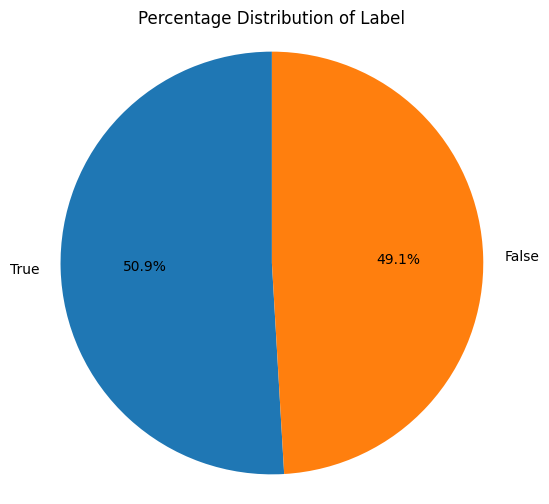

In [5]:
import matplotlib.pyplot as plt

# Calculate the value counts and percentages
value_counts = df['label'].value_counts()
percentages = value_counts / len(df) * 100

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(percentages, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage Distribution of Label')
plt.axis('equal')
plt.show()


####  Feature Extraction

In [8]:
# Split the dataset into train and test sets
X = df['full_text']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text data to numerical features using TF-IDF vectorization
vectorizer = CountVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

#### Model Training and Evaluation

In [9]:
#Train the logistic regression model:
model = LogisticRegression()
model.fit(X_train_vect, y_train)

C:\Users\vaibh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [10]:
# Make predictions on the test set:
y_pred = model.predict(X_test_vect)

In [11]:
#Evaluate the model's performance:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.9147853441894893
Classification Report:
              precision    recall  f1-score   support

       False       0.92      0.90      0.91      5286
        True       0.91      0.93      0.92      5522

    accuracy                           0.91     10808
   macro avg       0.92      0.91      0.91     10808
weighted avg       0.92      0.91      0.91     10808

Confusion Matrix:
[[4751  535]
 [ 386 5136]]


#### Bar plot of sentiment distribution:

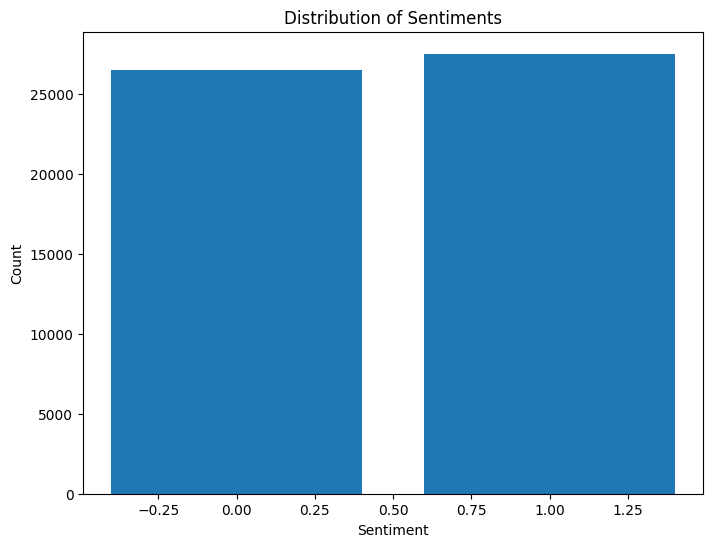

In [12]:
sentiment_counts = df['label'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments')
plt.show()

#### Confusion matrix

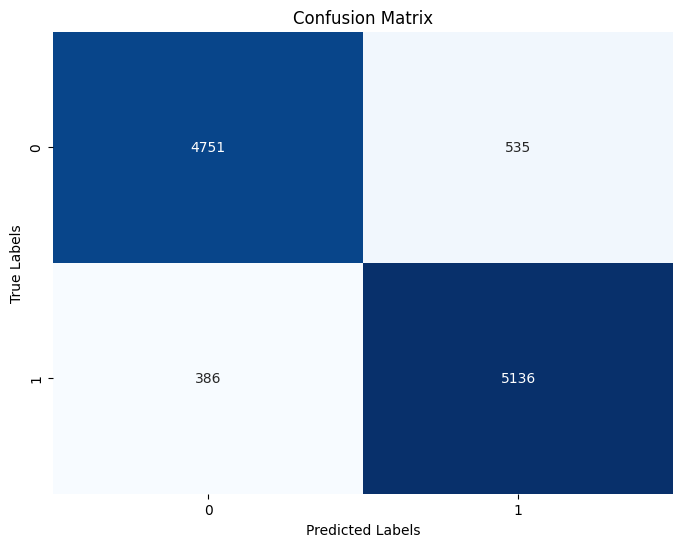

In [13]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [17]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[4751  535]
 [ 386 5136]]


In [18]:
TN = conf_matrix[0, 0]  # True Negatives
FP = conf_matrix[0, 1]  # False Positives
FN = conf_matrix[1, 0]  # False Negatives
TP = conf_matrix[1, 1]  # True Positives

# Calculate TPR (Sensitivity, Recall)
TPR = TP / (TP + FN)

# Calculate FPR
FPR = FP / (FP + TN)

print(f"True Positive Rate (TPR): {TPR}")
print(f"False Positive Rate (FPR): {FPR}")


True Positive Rate (TPR): 0.9300977906555595
False Positive Rate (FPR): 0.1012107453651154
